model agnostic

In [1]:
# !pip install pip install -U pyartemis

In [2]:
from util_comp import *
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod
from time import time

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import warnings

warnings.filterwarnings("ignore")

In [3]:
data = main(retained=True)

Only retained columns are used
Shape of data: (44535, 72)
Elapsed time to compute age categorisation: 0 minutes and 0 seconds
Elapsed time to compute load column names: 0 minutes and 0 seconds
Elapsed time to compute clean data: 0 minutes and 0 seconds
Elapsed time to compute categorisation of outcome column: 0 minutes and 3 seconds
Dropped rows with missing values
Elapsed time to compute change values in catagorical columns: 1 minutes and 16 seconds
Elapsed time to compute Full process: 1 minutes and 20 seconds


In [4]:
# Splitting the data into X and y
X = data[(data['outcome'] == 0) | (data['outcome'] == 1)].drop('outcome',axis=1)
X.columns = [str(col) for col in X.columns]
y = data[(data['outcome'] == 0) | (data['outcome'] == 1)]['outcome']

In [5]:
# Balancing the data using SMOTE
X, y = smote(X, y)

y_train: 
0    15602
1    15602
Name: outcome, dtype: int64
Elapsed time to compute oversampling using SMOTE: 0 minutes and 0 seconds


In [6]:
# RF model
rf = RandomForestClassifier(class_weight='balanced')

rf.fit(X, y)

RandomForestClassifier(class_weight='balanced')

Fedmans H Statistics

In [7]:
# Get random selection of 100 observations

random.seed(42)
X_exp = random.choices(X.to_numpy(), k=100)
X_exp = pd.DataFrame(X_exp, columns=X.columns)

In [8]:
h_stat = FriedmanHStatisticMethod()
t1 = time()
h_stat.fit(rf, X_exp, show_progress=True)
t2 = time()
print(time_e(t1, t2, 'Friedman H Statistic'))

Calculating one vs all interactions: 100%|██████████| 66/66 [00:21<00:00,  3.05it/s]

Elapsed time to compute Friedman H Statistic: 1 minutes and 35 seconds


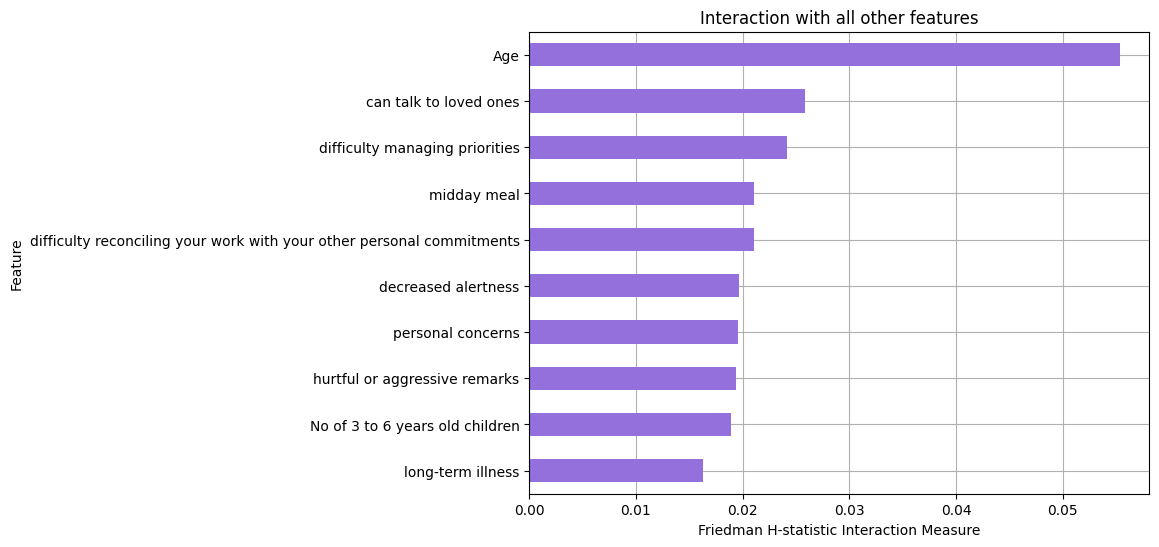

In [9]:
# Overall interactions
# fig, ax = plt.subplots(figsize=(20, 12))
h_stat.plot(vis_type='bar_chart_ova') # (, ax=ax)

# save the plot
plt.savefig('outputs/01_02_01_hStat/hStat_OverAll.png', bbox_inches='tight')

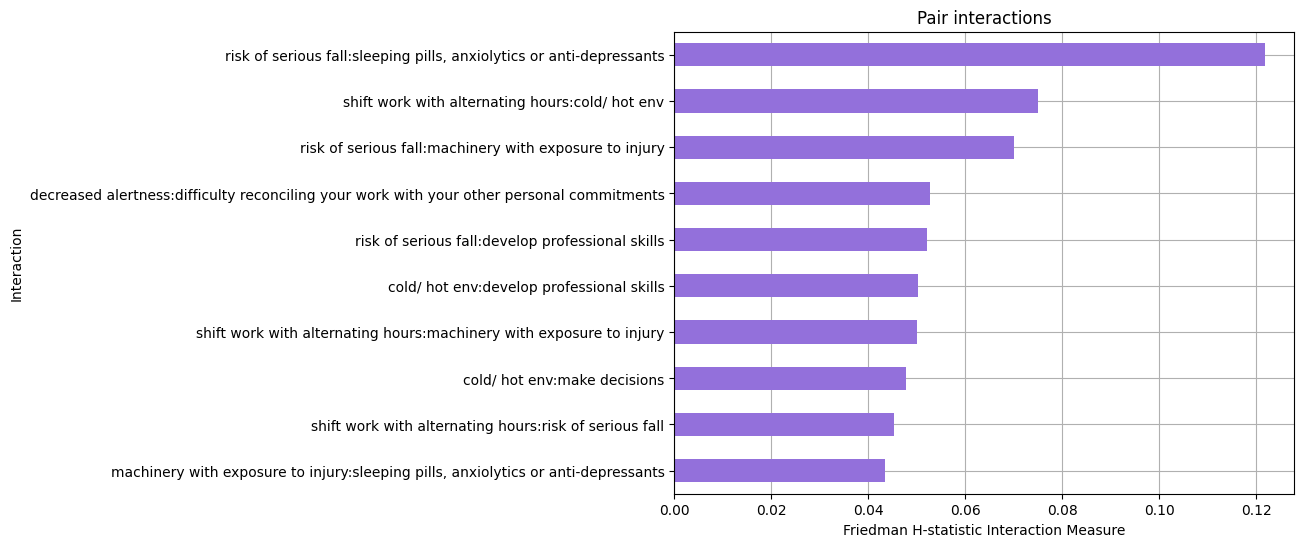

In [10]:
# Pairwise interactions
# fig, ax = plt.subplots(figsize=(20, 12))
h_stat.plot(vis_type='bar_chart') # (, ax=ax)

# save the plot
plt.savefig('outputs/01_02_01_hStat/hStat_Pairwise.png', bbox_inches='tight')

In [11]:
h_stat.feature_importance[:20]

Feature  Importance
0                                 decreased alertness    0.082384
1                                                 Age    0.066892
2                   No of 13 to 17 years old children    0.061819
3                              can talk to loved ones    0.060476
4   difficulty reconciling your work with your oth...    0.055262
5                     No of 3 to 6 years old children    0.045166
6                       long periods of concentration    0.042935
7                                 Full Time/Part Time    0.042500
8                                   personal concerns    0.042092
9                                         midday meal    0.041327
10                   No of 7 to 12 years old children    0.036281
11                   No of 18 years and over children    0.032553
12                               tools or workstation    0.030550
13                                     work on screen    0.029934
14                     difficulty managing priorities    0.029709
15                                  long-term illness    0.028600
16                    good understanding where I work    0.026256
17                      hurtful or aggressive remarks    0.026203
18                clarity of your role in the company    0.024600
19                     work quickly or very intensely    0.022489

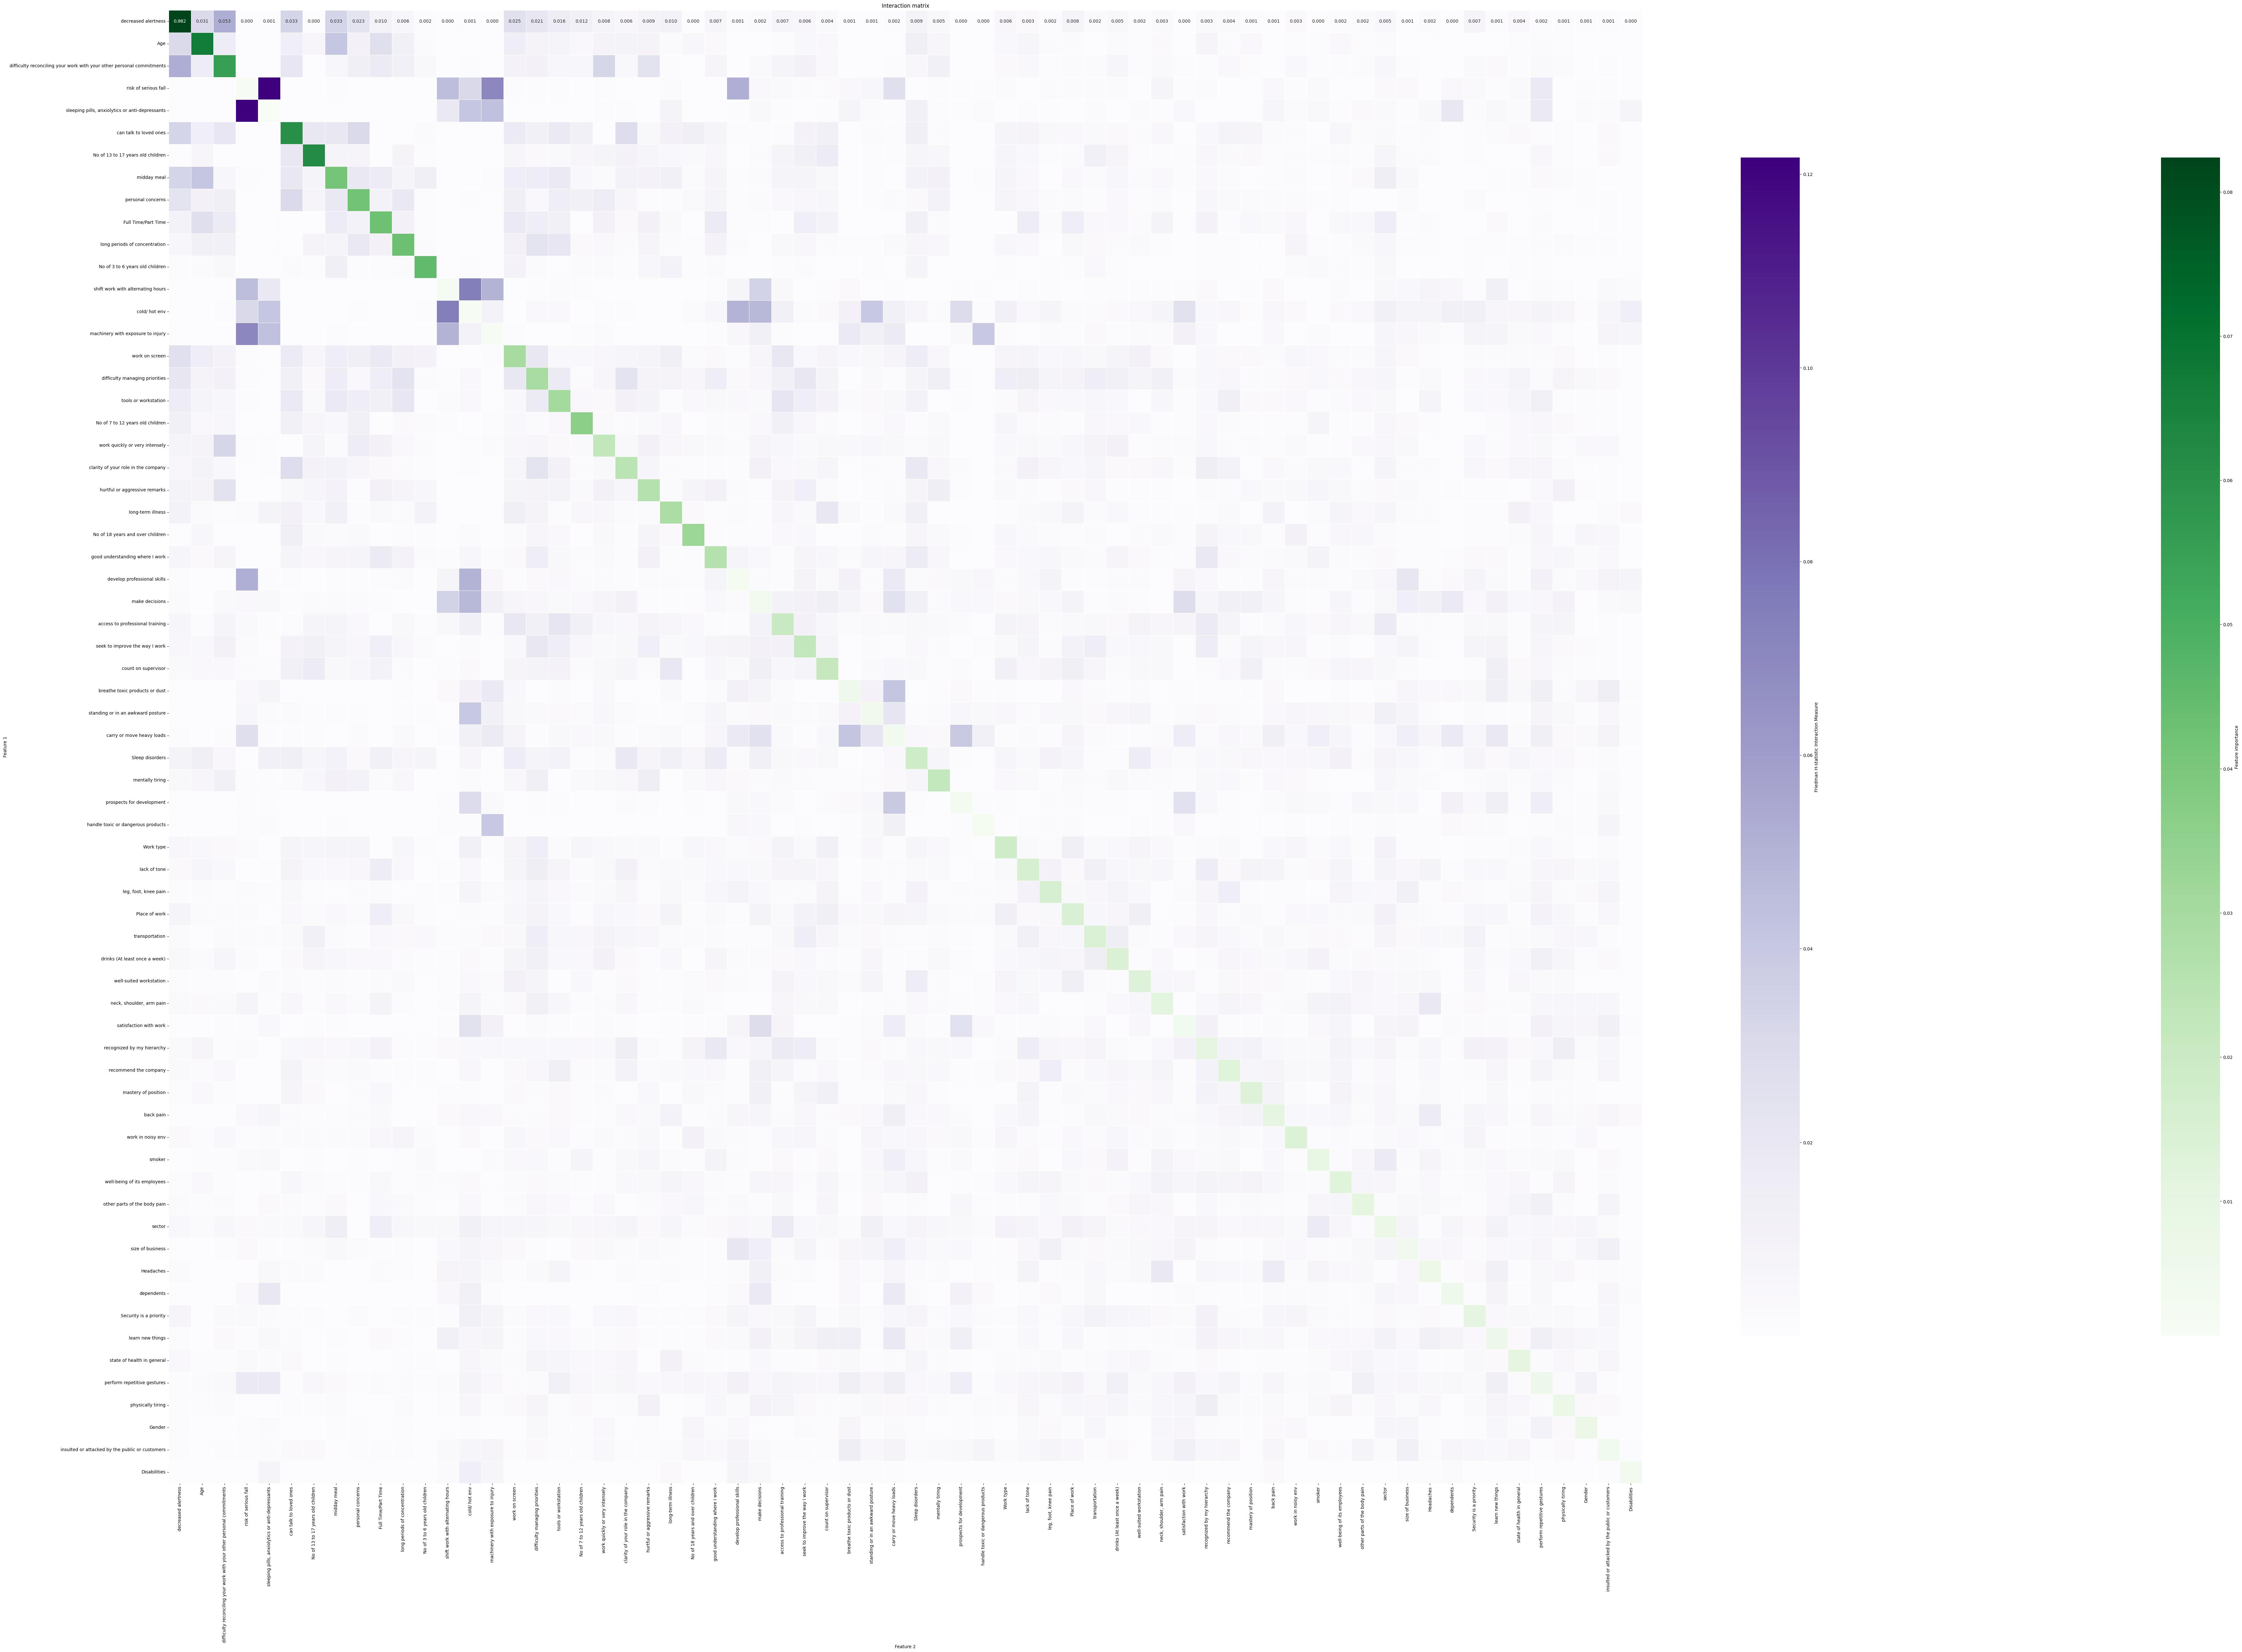

In [12]:
# Interaction heatmap
h_stat.plot(figsize=(100, 60))

# save the plot
plt.savefig('outputs/01_02_01_hStat/hStat_Heatmap_normalised.png', bbox_inches='tight')

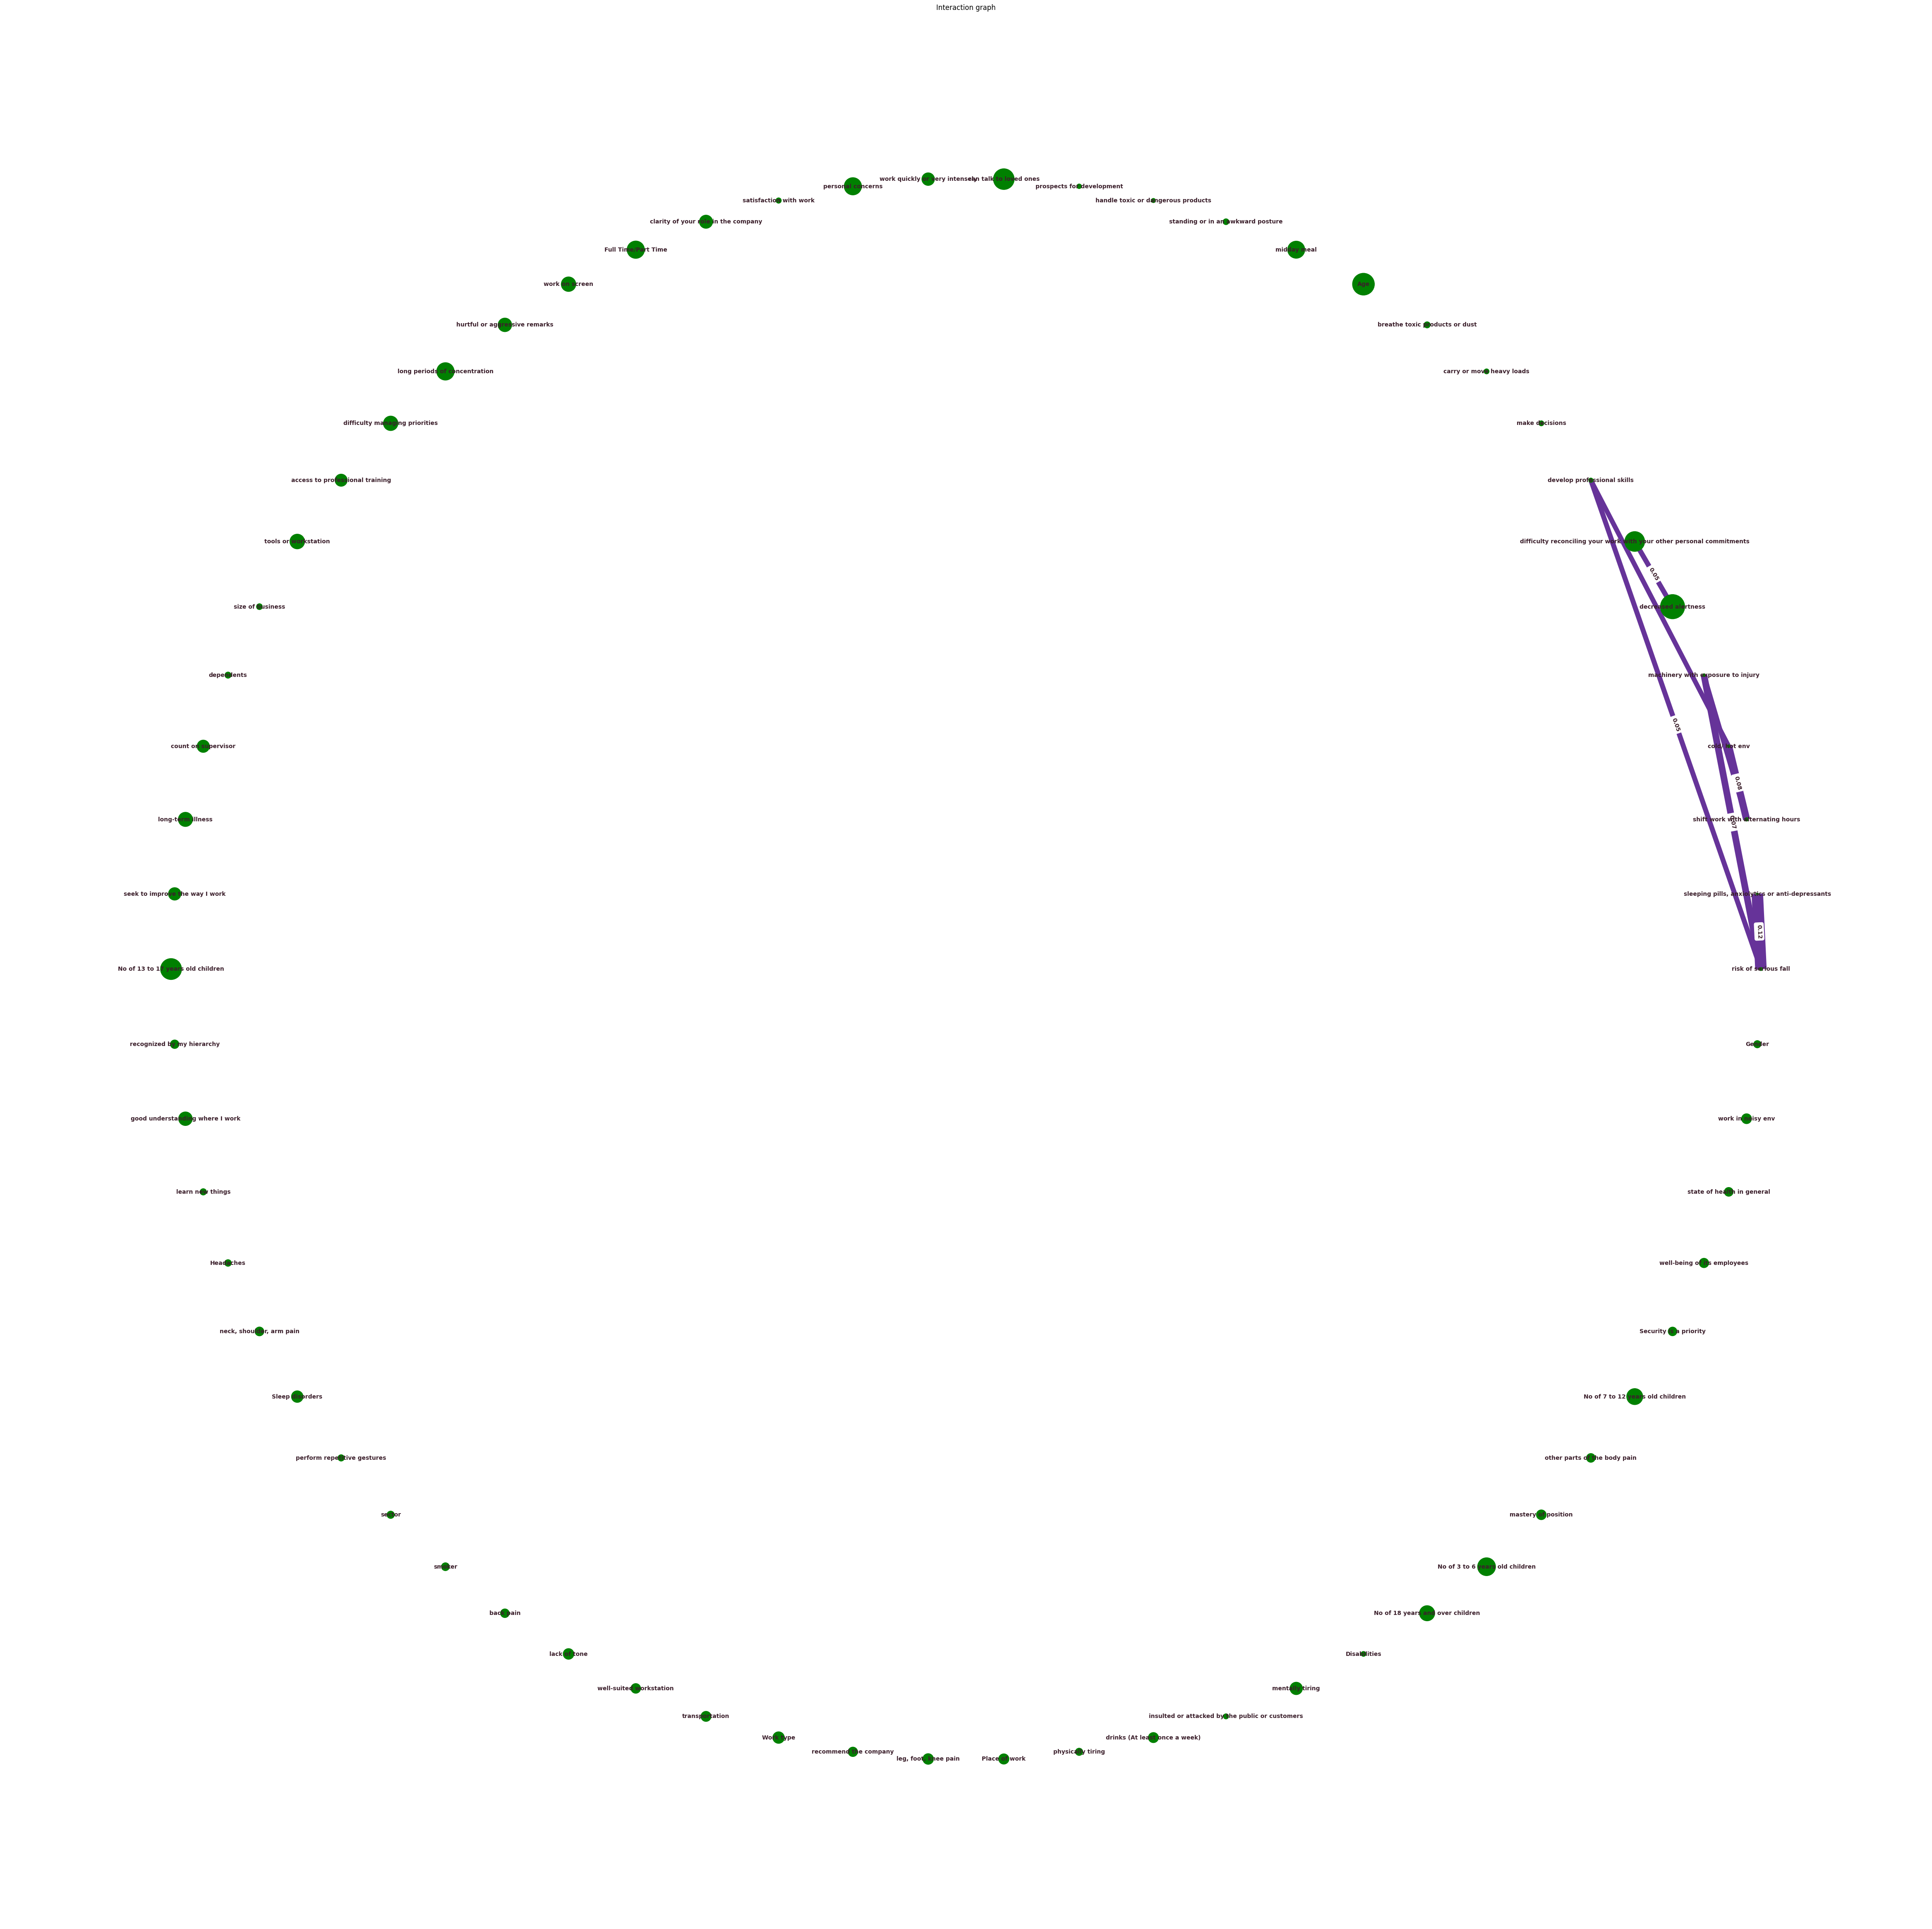

In [13]:
h_stat.plot(vis_type='graph', figsize=(60,60)) # (, ax=ax)

# save the plot
plt.savefig('outputs/01_02_01_hStat/hStat_graph.png', bbox_inches='tight')

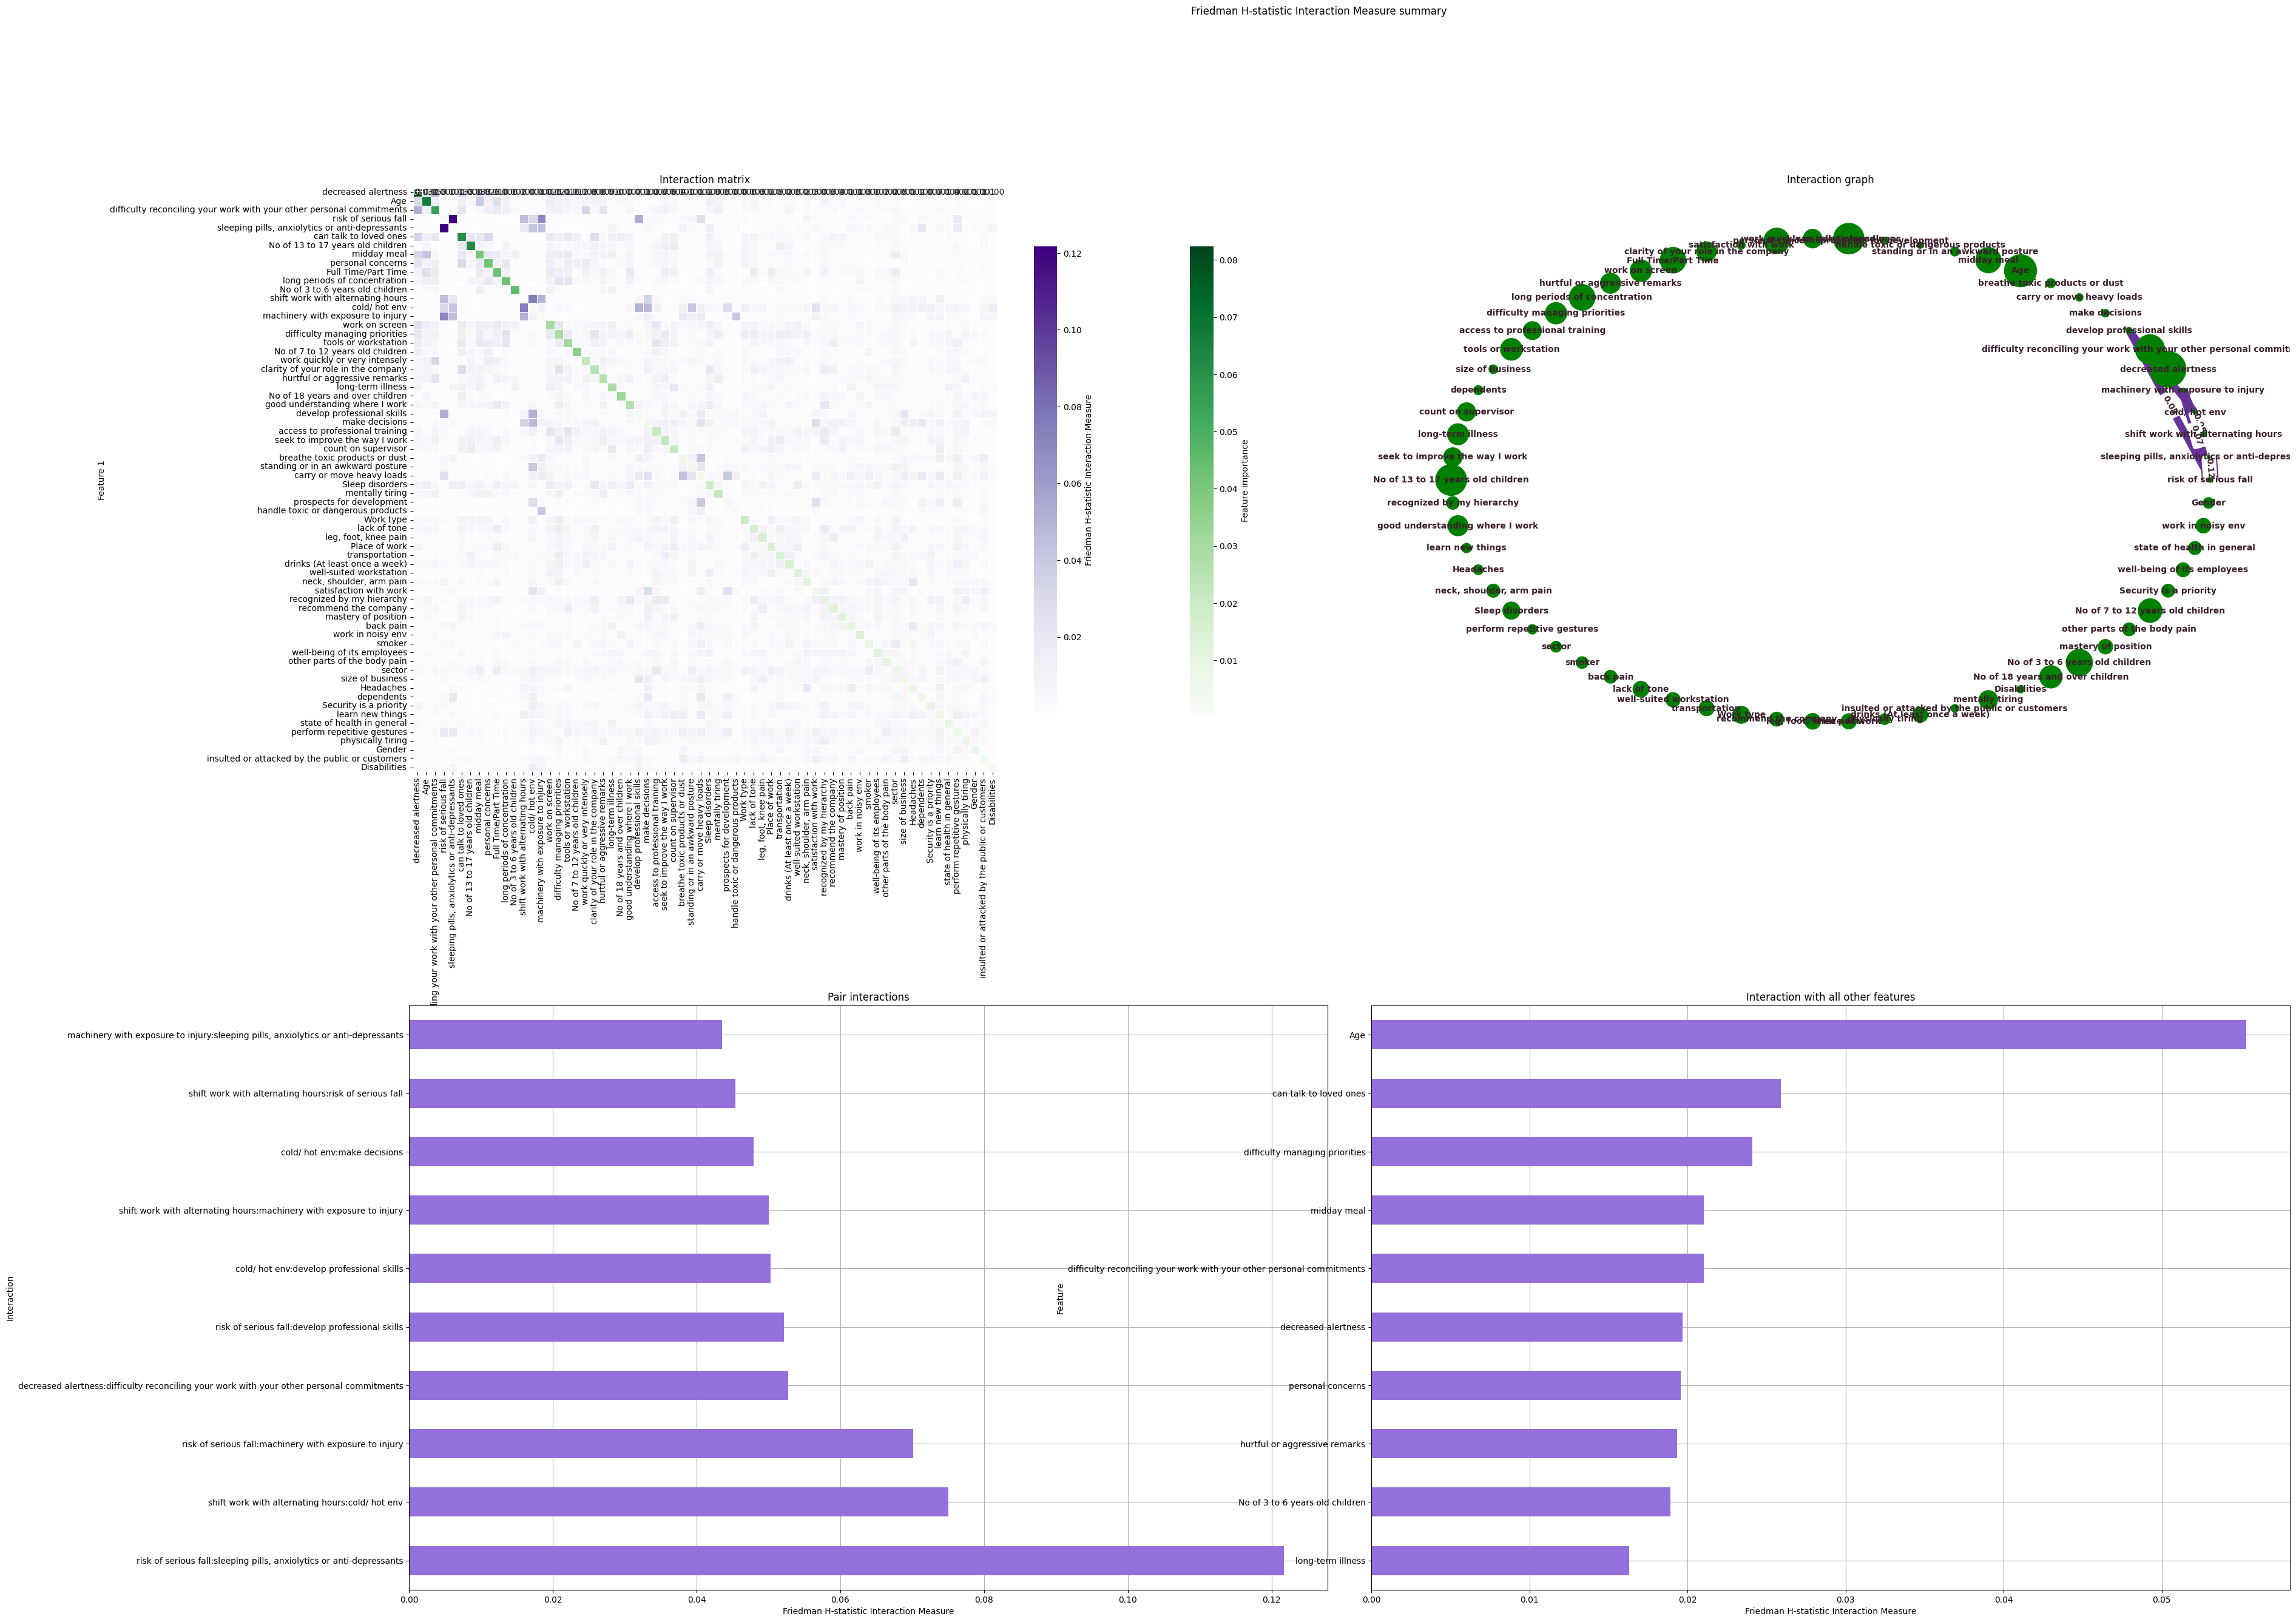

In [14]:
h_stat.plot(vis_type='summary') # (, ax=ax)

# save the plot
plt.savefig('outputs/01_02_01_hStat/hStat_summary.png', bbox_inches='tight')

Unnormalised H-Statistic

In [15]:
h_stat_unnormalised = FriedmanHStatisticMethod(normalized=False)
t1 = time()
h_stat_unnormalised.fit(rf, X_exp, show_progress=True)
t2 = time()
print(time_e(t1, t2, 'Friedman H Statistic unnormalised'))

Calculating one vs all interactions: 100%|██████████| 66/66 [00:22<00:00,  2.90it/s]

Elapsed time to compute Friedman H Statistic unnormalised: 1 minutes and 29 seconds


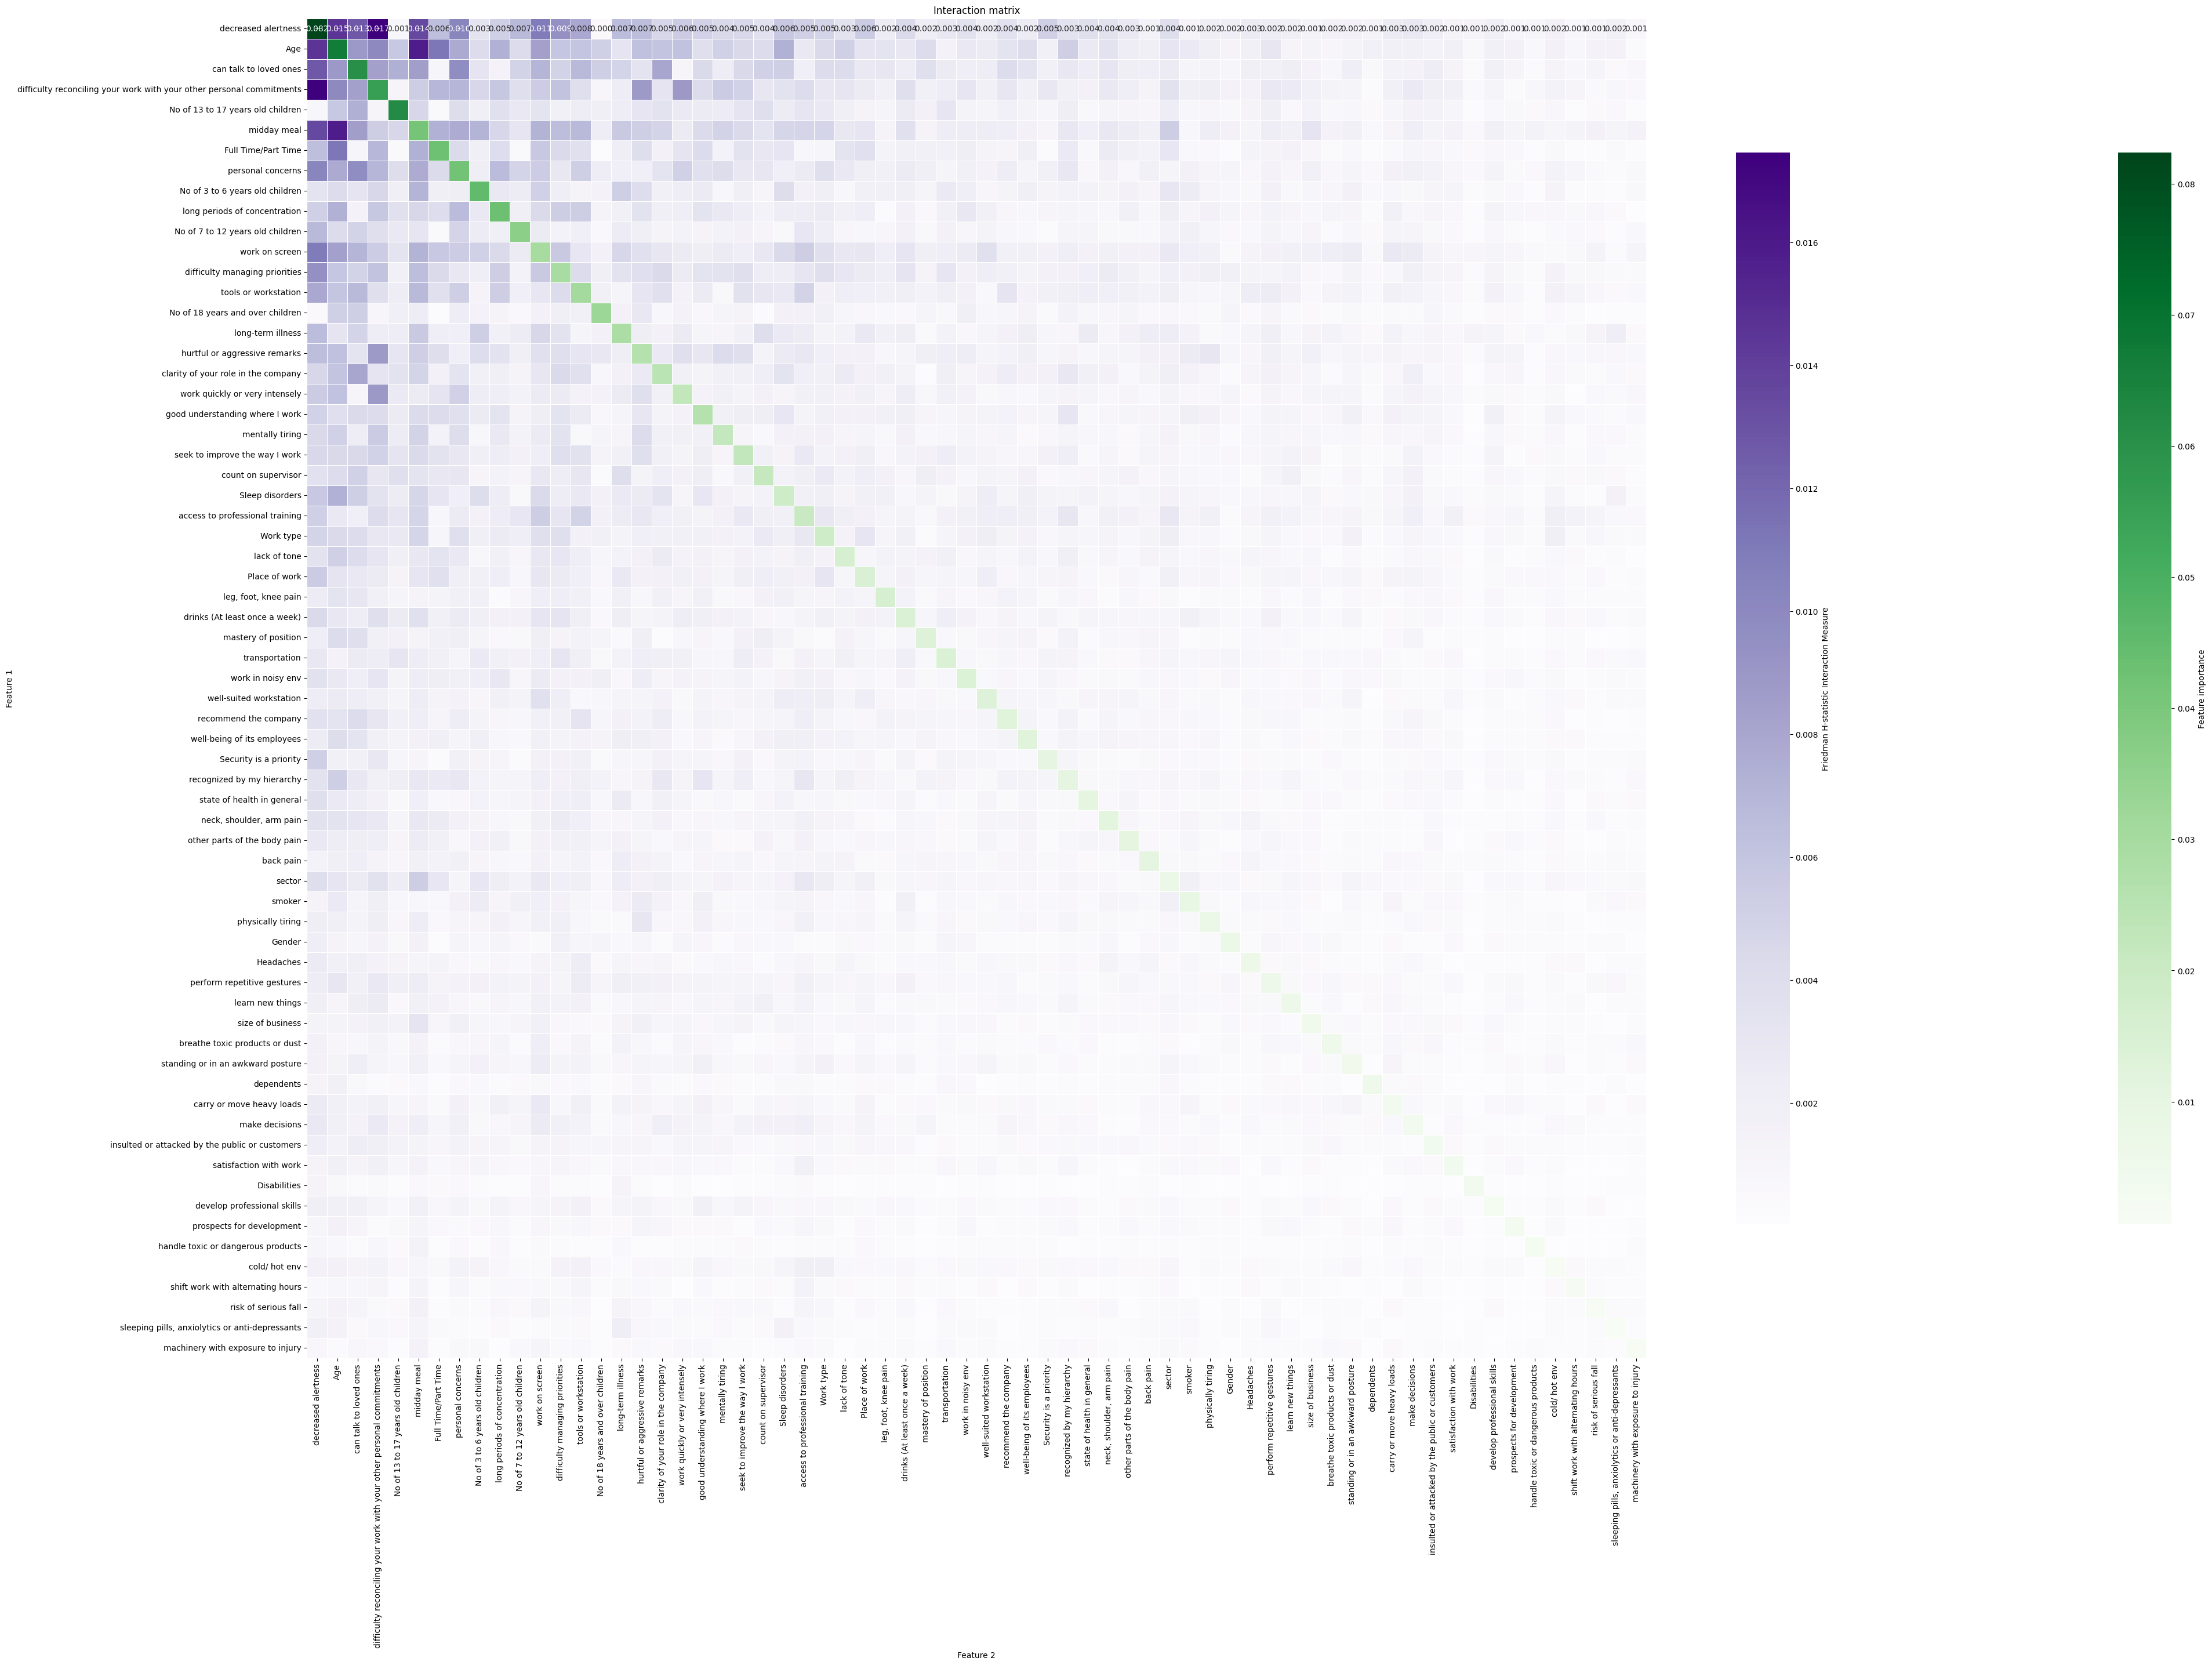

In [16]:
# Plot heatmap
fig, ax = plt.subplots(figsize=(50, 30))
h_stat_unnormalised.plot(ax=ax)

# save the plot
fig.savefig('outputs/01_02_01_hStat/hStat_heatmap_unnormalised.png', bbox_inches='tight')

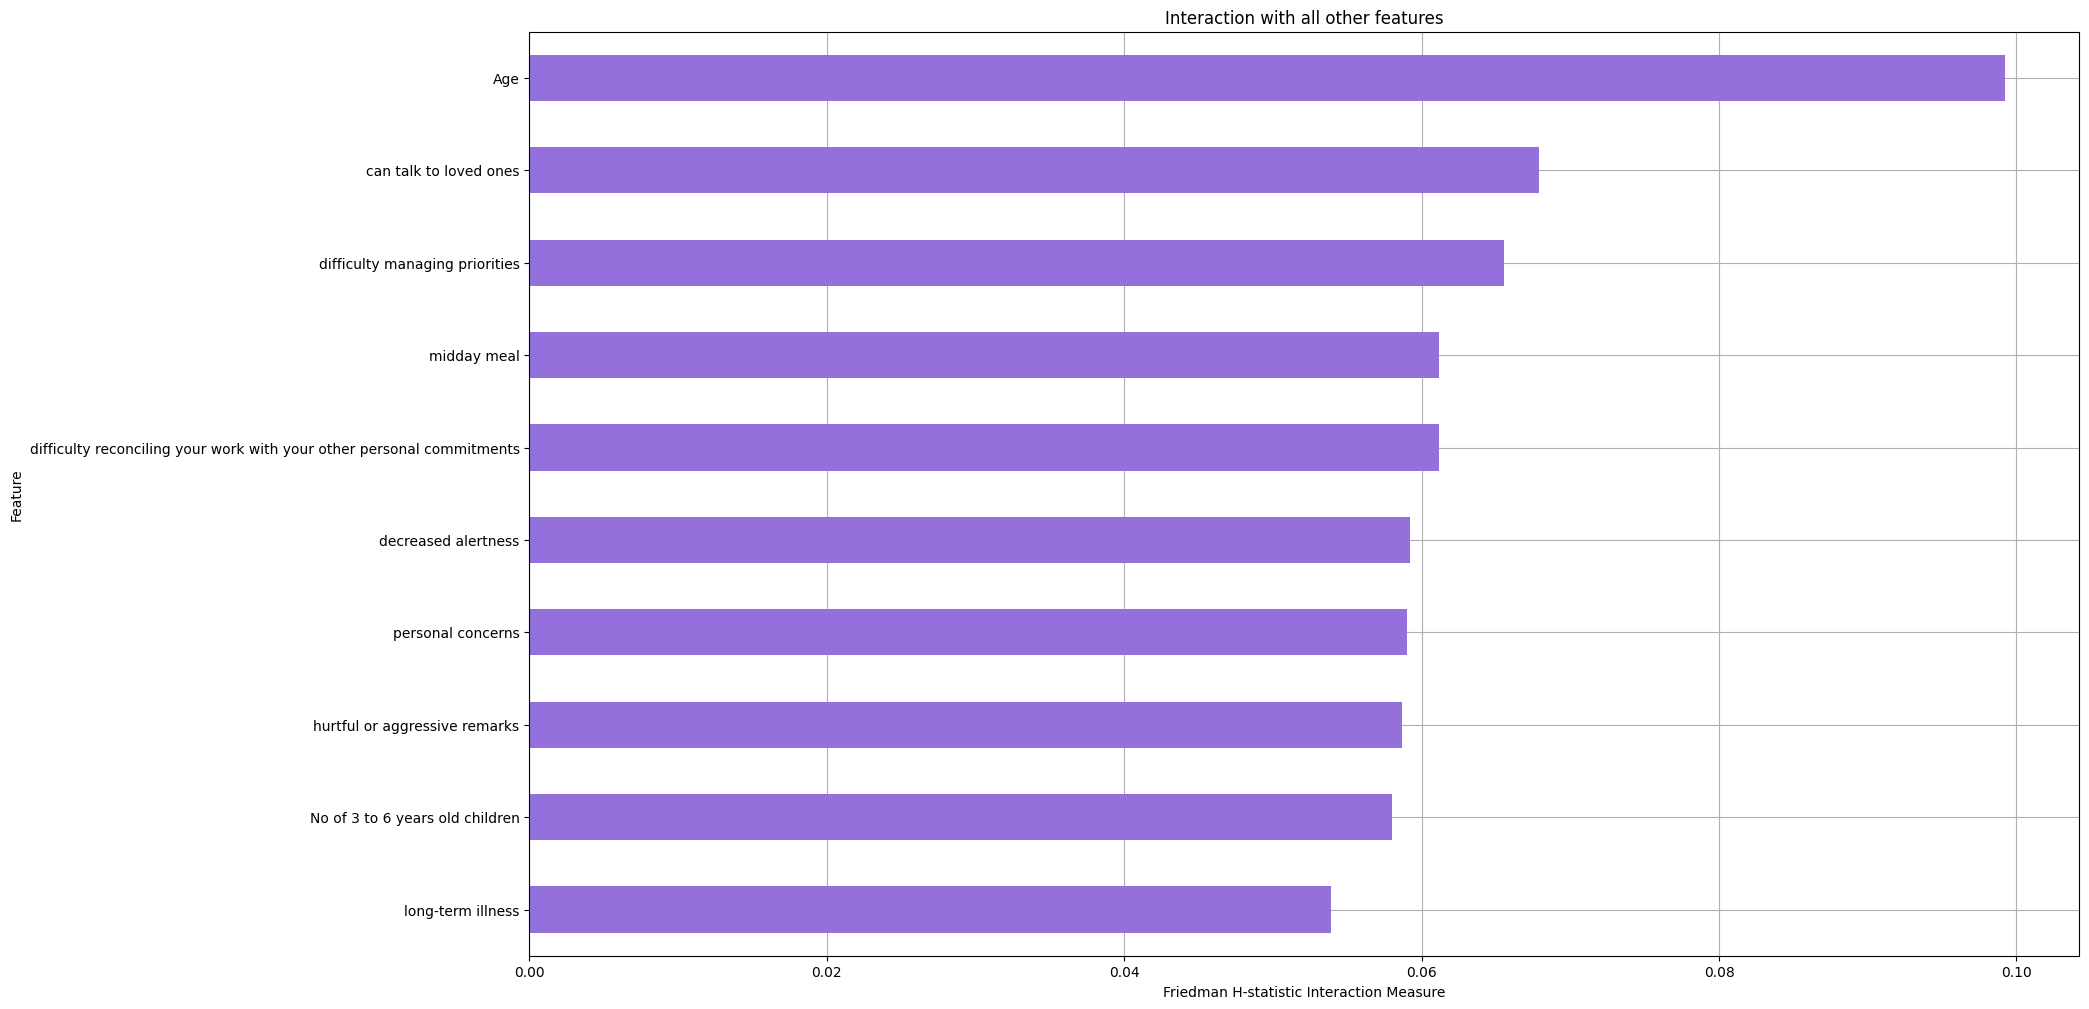

In [17]:
# Plot overall interactions
fig, ax = plt.subplots(figsize=(20, 12))
h_stat_unnormalised.plot(vis_type='bar_chart_ova', ax=ax)

# save the plot
plt.savefig('outputs/01_02_01_hStat/overall_interactions_unnormalised.png', bbox_inches='tight')

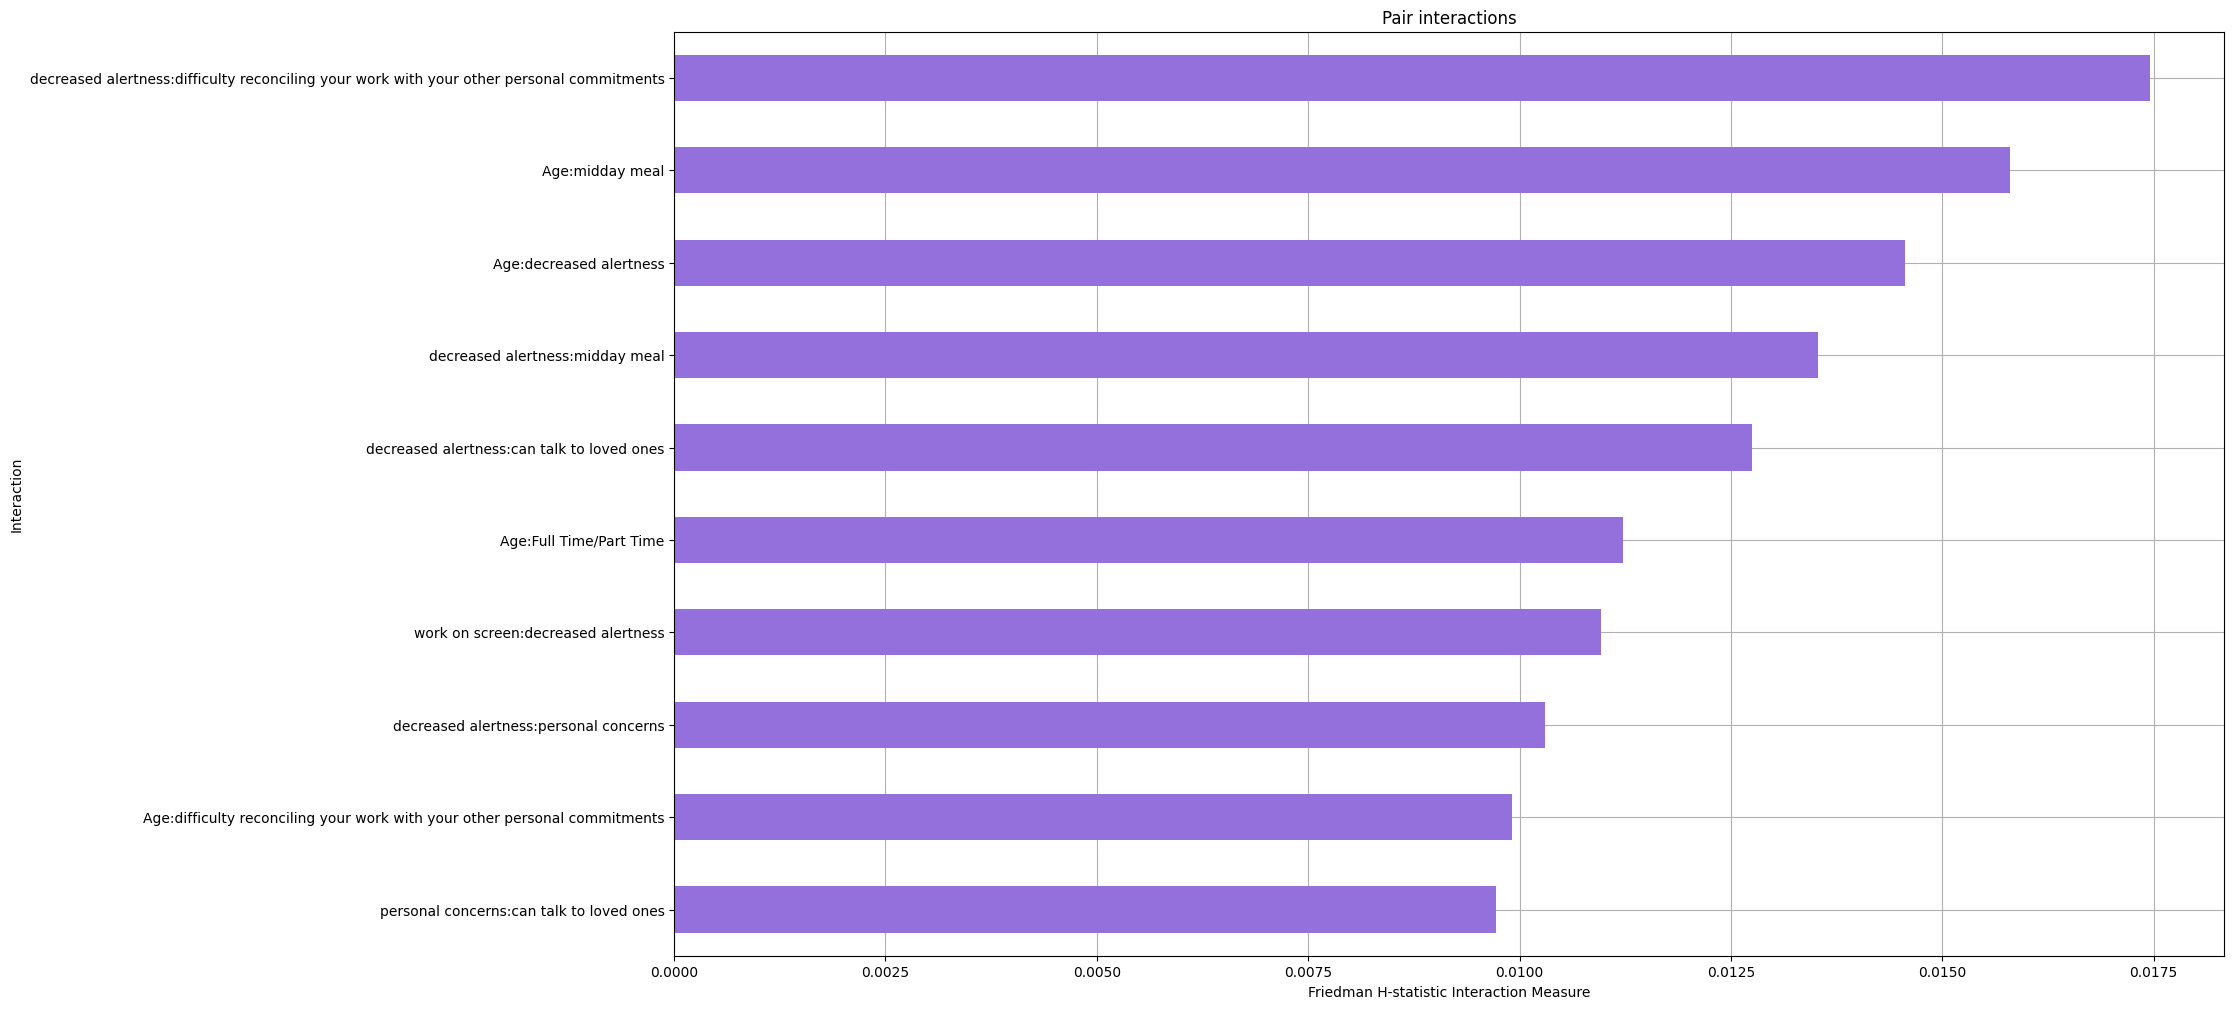

In [18]:
# Plot pairwise interactions
fig, ax = plt.subplots(figsize=(20, 12))
h_stat_unnormalised.plot(vis_type='bar_chart', ax=ax)

# save the plot
plt.savefig('outputs/01_02_01_hStat/pairwise_interactions_unnormalised.png', bbox_inches='tight')

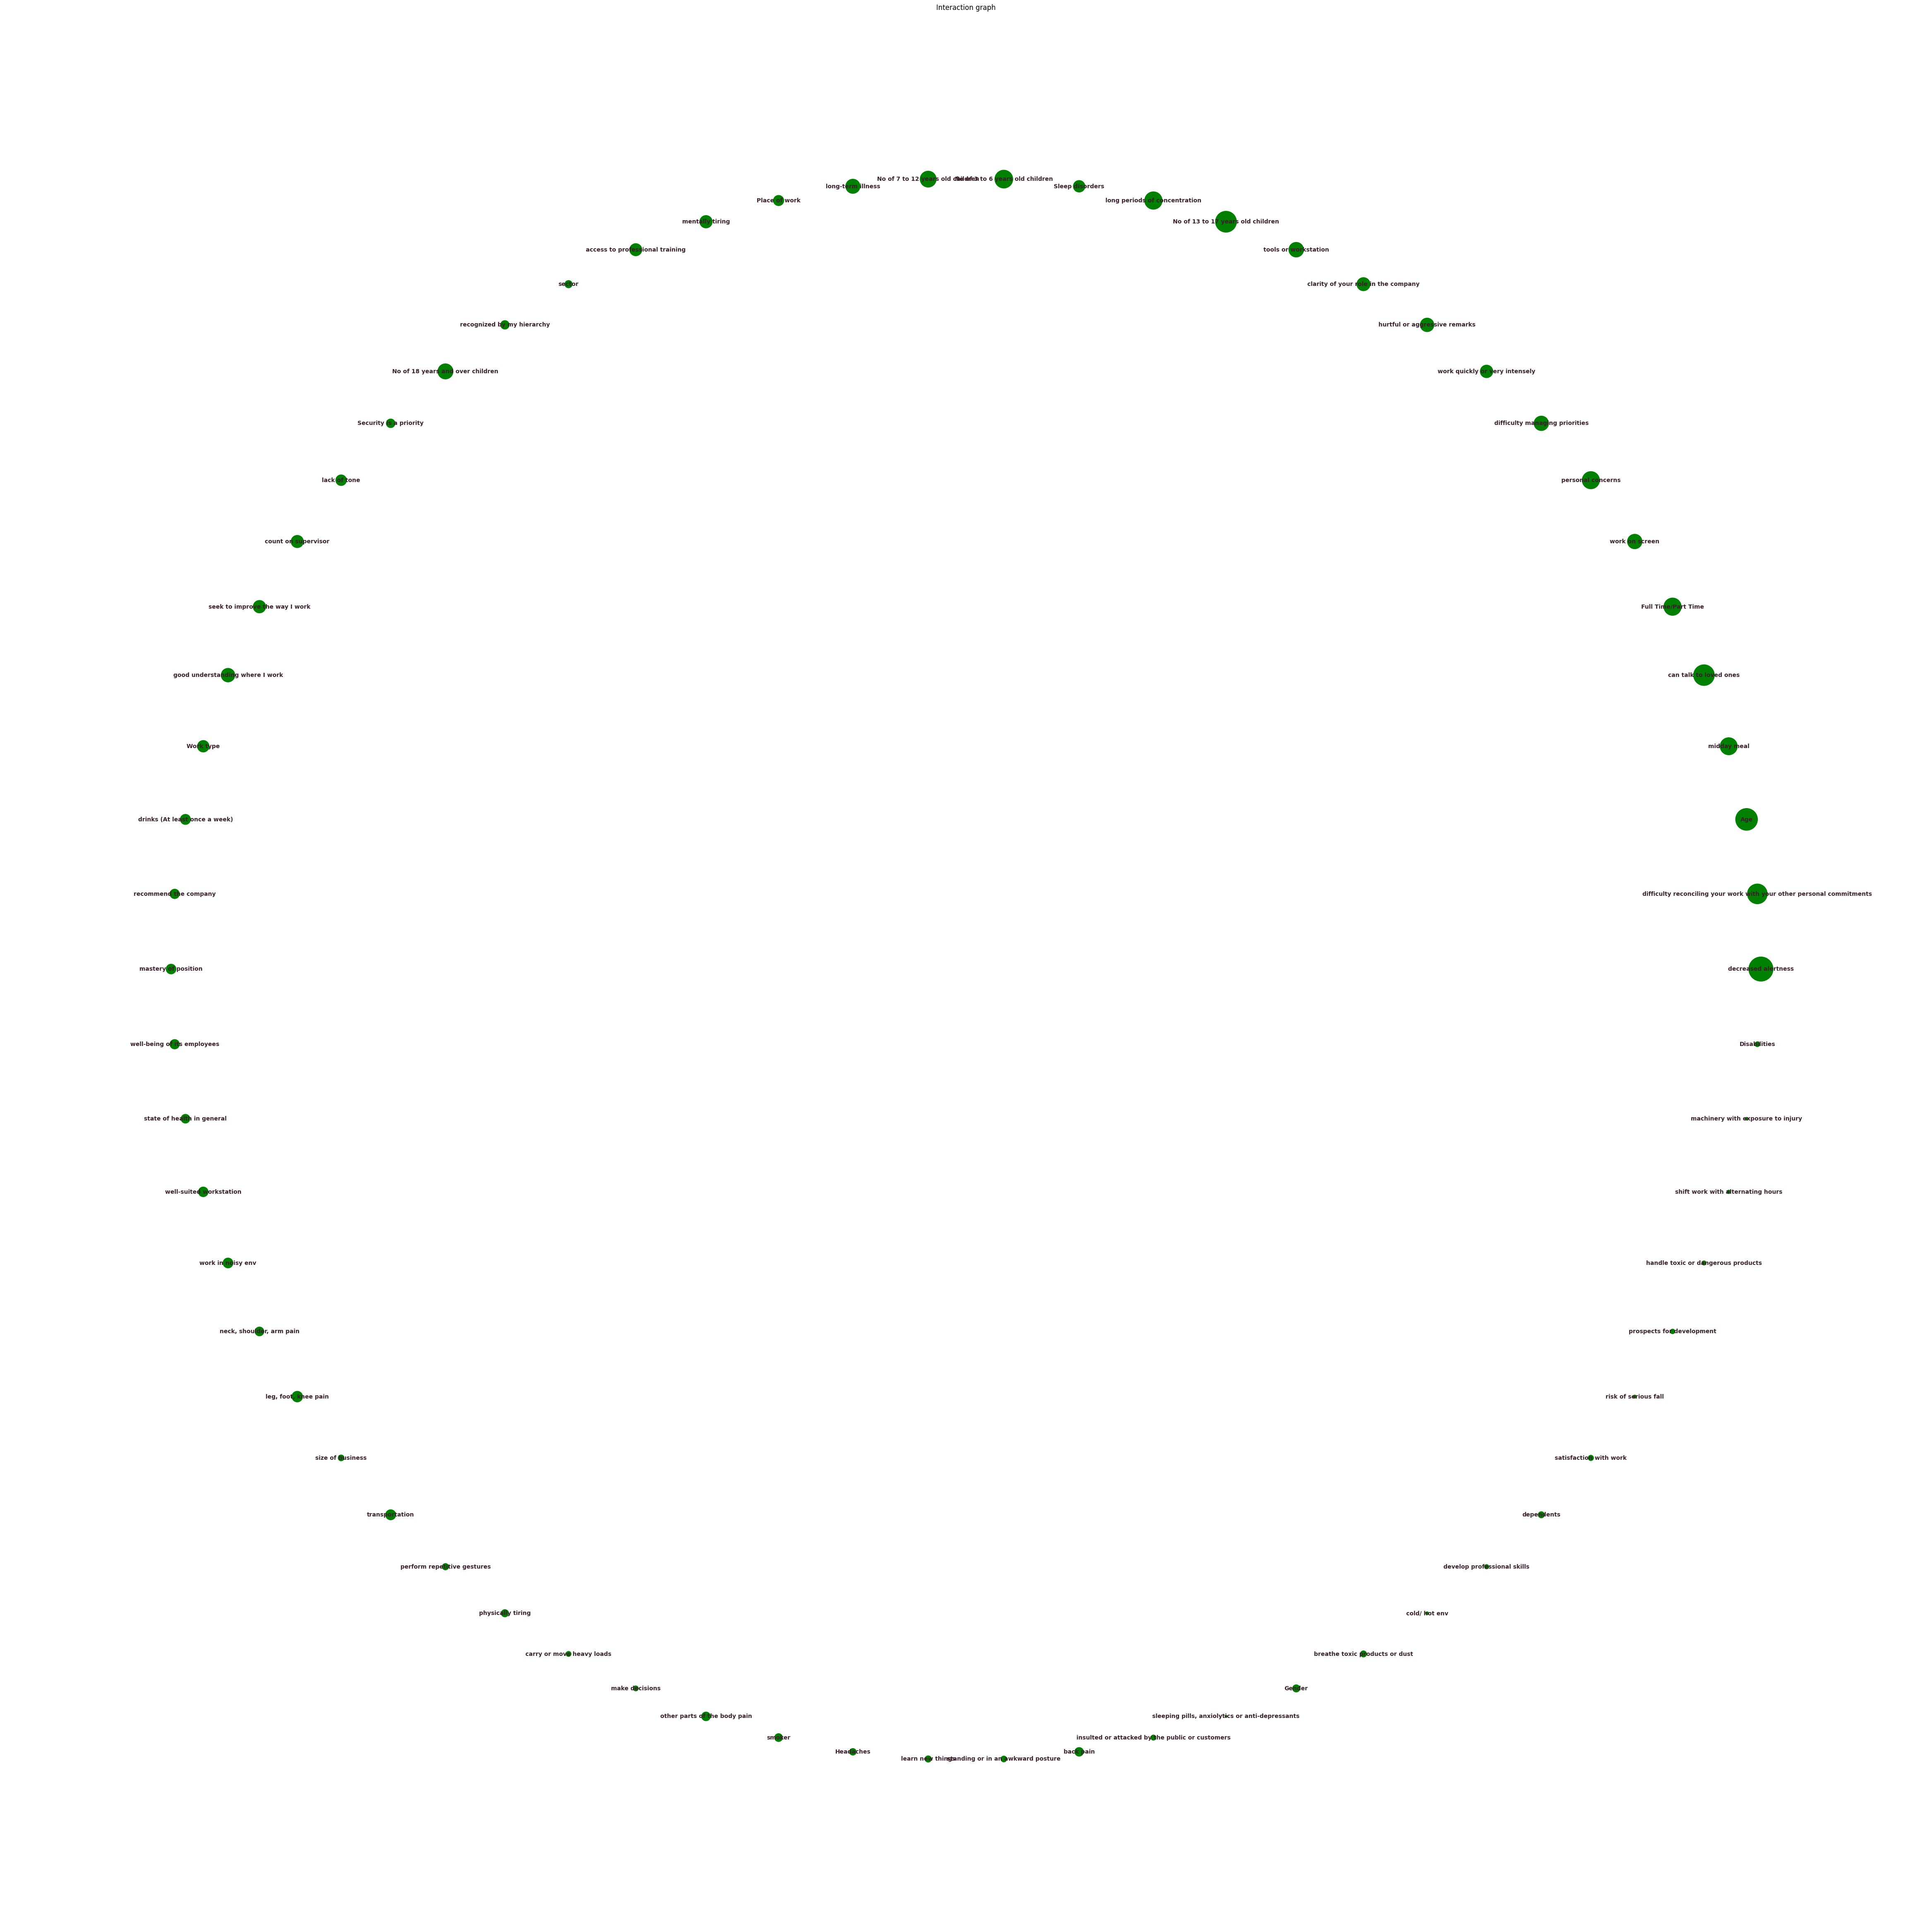

In [19]:
h_stat_unnormalised.plot(vis_type='graph', figsize=(60,60)) # graph of feature interactions values

# save the plot
plt.savefig('outputs/01_02_01_hStat/hStat_un_graph.png', bbox_inches='tight')

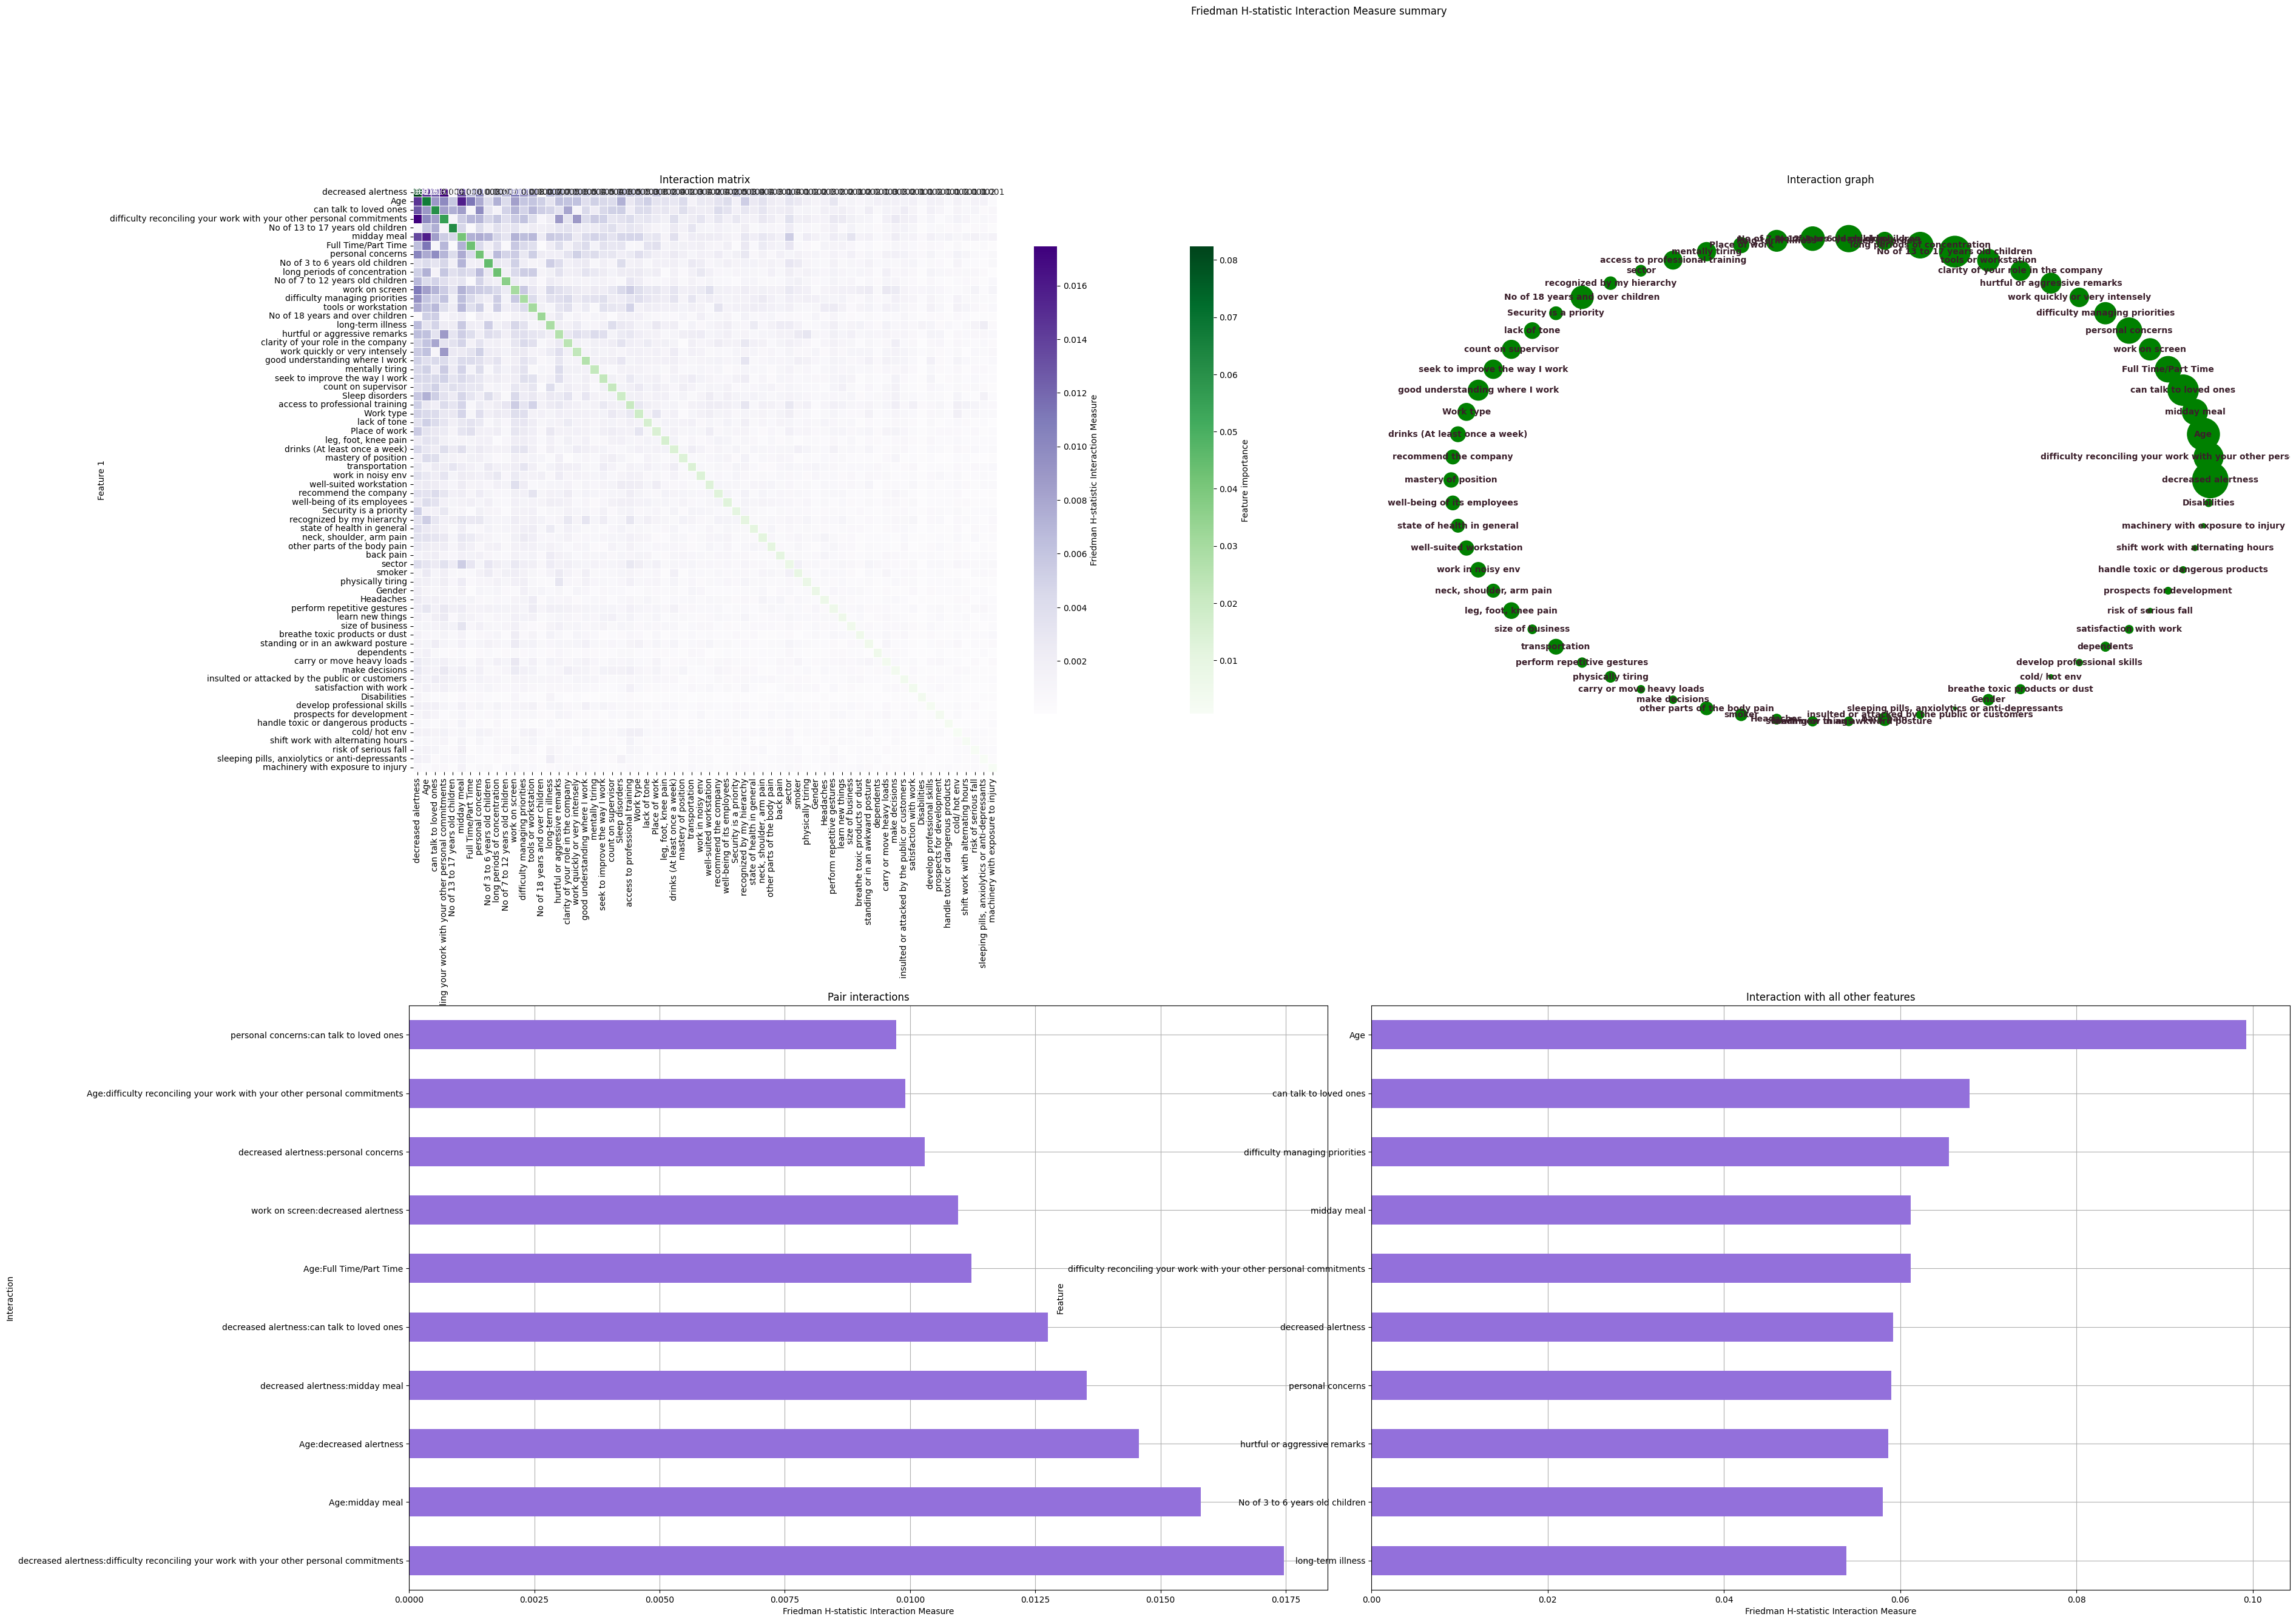

In [20]:
h_stat_unnormalised.plot(vis_type='summary') # (, ax=ax)

# save the plot
plt.savefig('outputs/01_02_01_hStat/hStat_un_summary.png', bbox_inches='tight')

In [21]:
X_exp.columns[0]

'Gender'

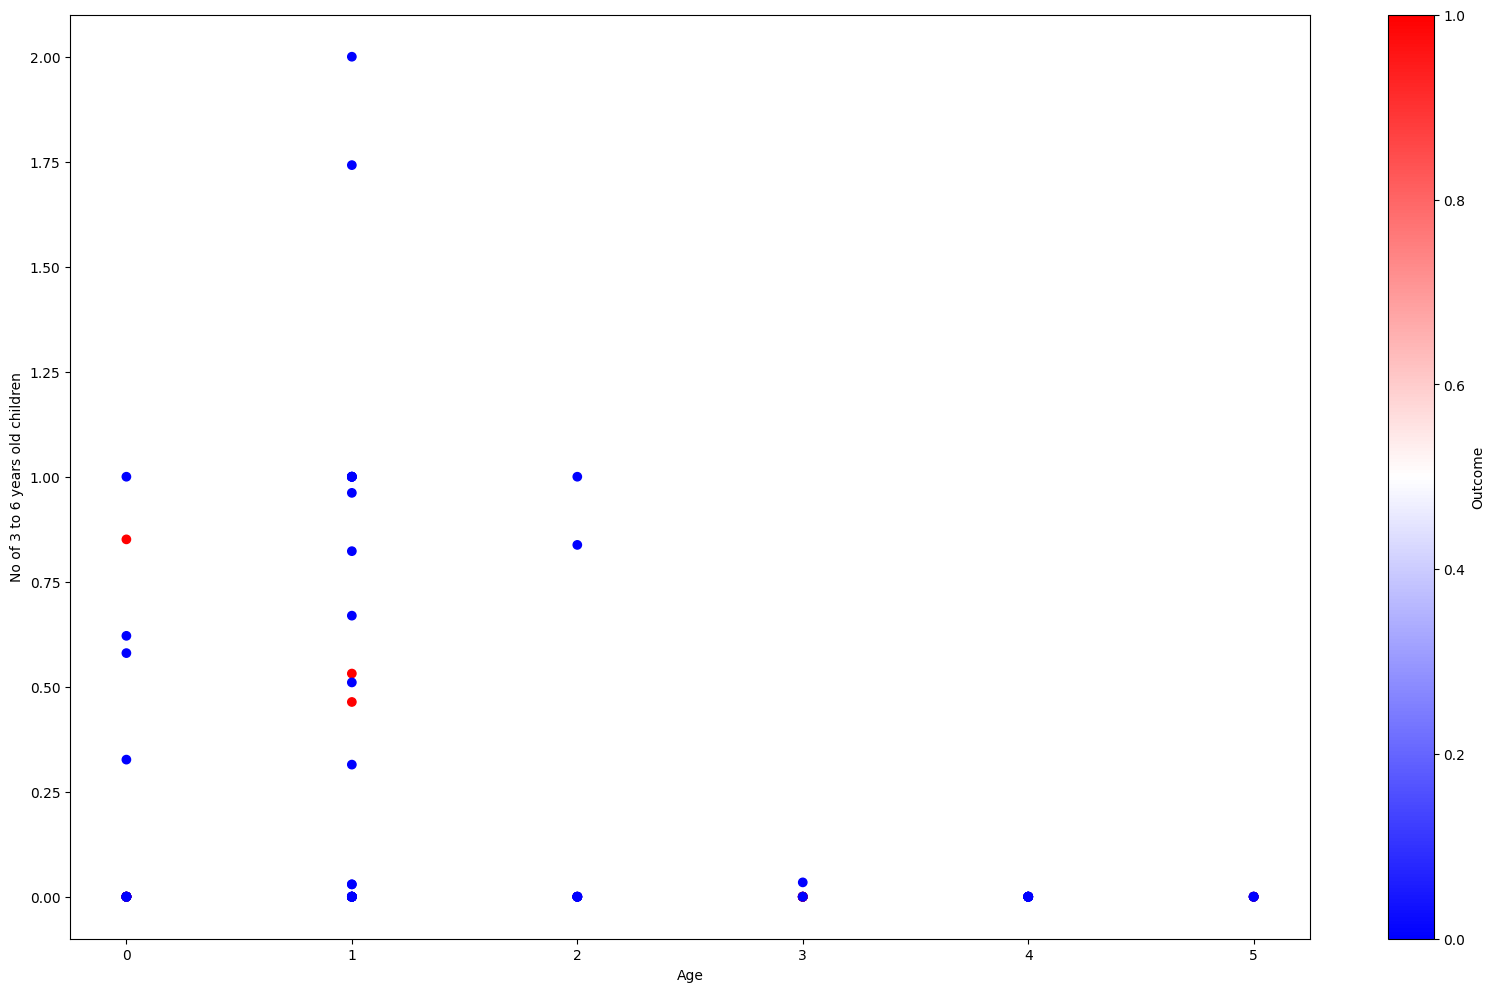

In [23]:
# Interaction between two features
fig, ax = plt.subplots(figsize=(20, 12))
plt.scatter(X_exp[X.columns[1]], X_exp[X.columns[5]], c=y[:100], cmap='bwr')
plt.colorbar(label='Outcome', orientation='vertical')
plt.xlabel(X.columns[1])
plt.ylabel(X.columns[5])
plt.savefig('outputs/01_02_01_hStat/interaction_between_two_features.png', bbox_inches='tight')
plt.show()

In [24]:
h_stat_unnormalised.feature_importance[:20]

Feature  Importance
0                                 decreased alertness    0.082384
1                                                 Age    0.066892
2                   No of 13 to 17 years old children    0.061819
3                              can talk to loved ones    0.060476
4   difficulty reconciling your work with your oth...    0.055262
5                     No of 3 to 6 years old children    0.045166
6                       long periods of concentration    0.042935
7                                 Full Time/Part Time    0.042500
8                                   personal concerns    0.042092
9                                         midday meal    0.041327
10                   No of 7 to 12 years old children    0.036281
11                   No of 18 years and over children    0.032553
12                               tools or workstation    0.030550
13                                     work on screen    0.029934
14                     difficulty managing priorities    0.029709
15                                  long-term illness    0.028600
16                    good understanding where I work    0.026256
17                      hurtful or aggressive remarks    0.026203
18                clarity of your role in the company    0.024600
19                     work quickly or very intensely    0.022489